# Week3 Day2 Homework 

## I. Prediction

### 1. Understanding regression

#### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas = 데이터 프레임 Dataframe
# numpy = 고수준 연산 기능 High level mathematical function
# matpotlib / seaborn = 시각화 그래프 visualization, graph

In [5]:
df_raw = pd.read_csv("../week3/체질검사.csv")
df_raw.head(5)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [36]:
# Detecting Missing value 
# 결측치 찾기


df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
BMI        0
dtype: int64

In [37]:
df_raw.isna().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
BMI        0
dtype: int64

In [64]:
len(list(df_raw))

15

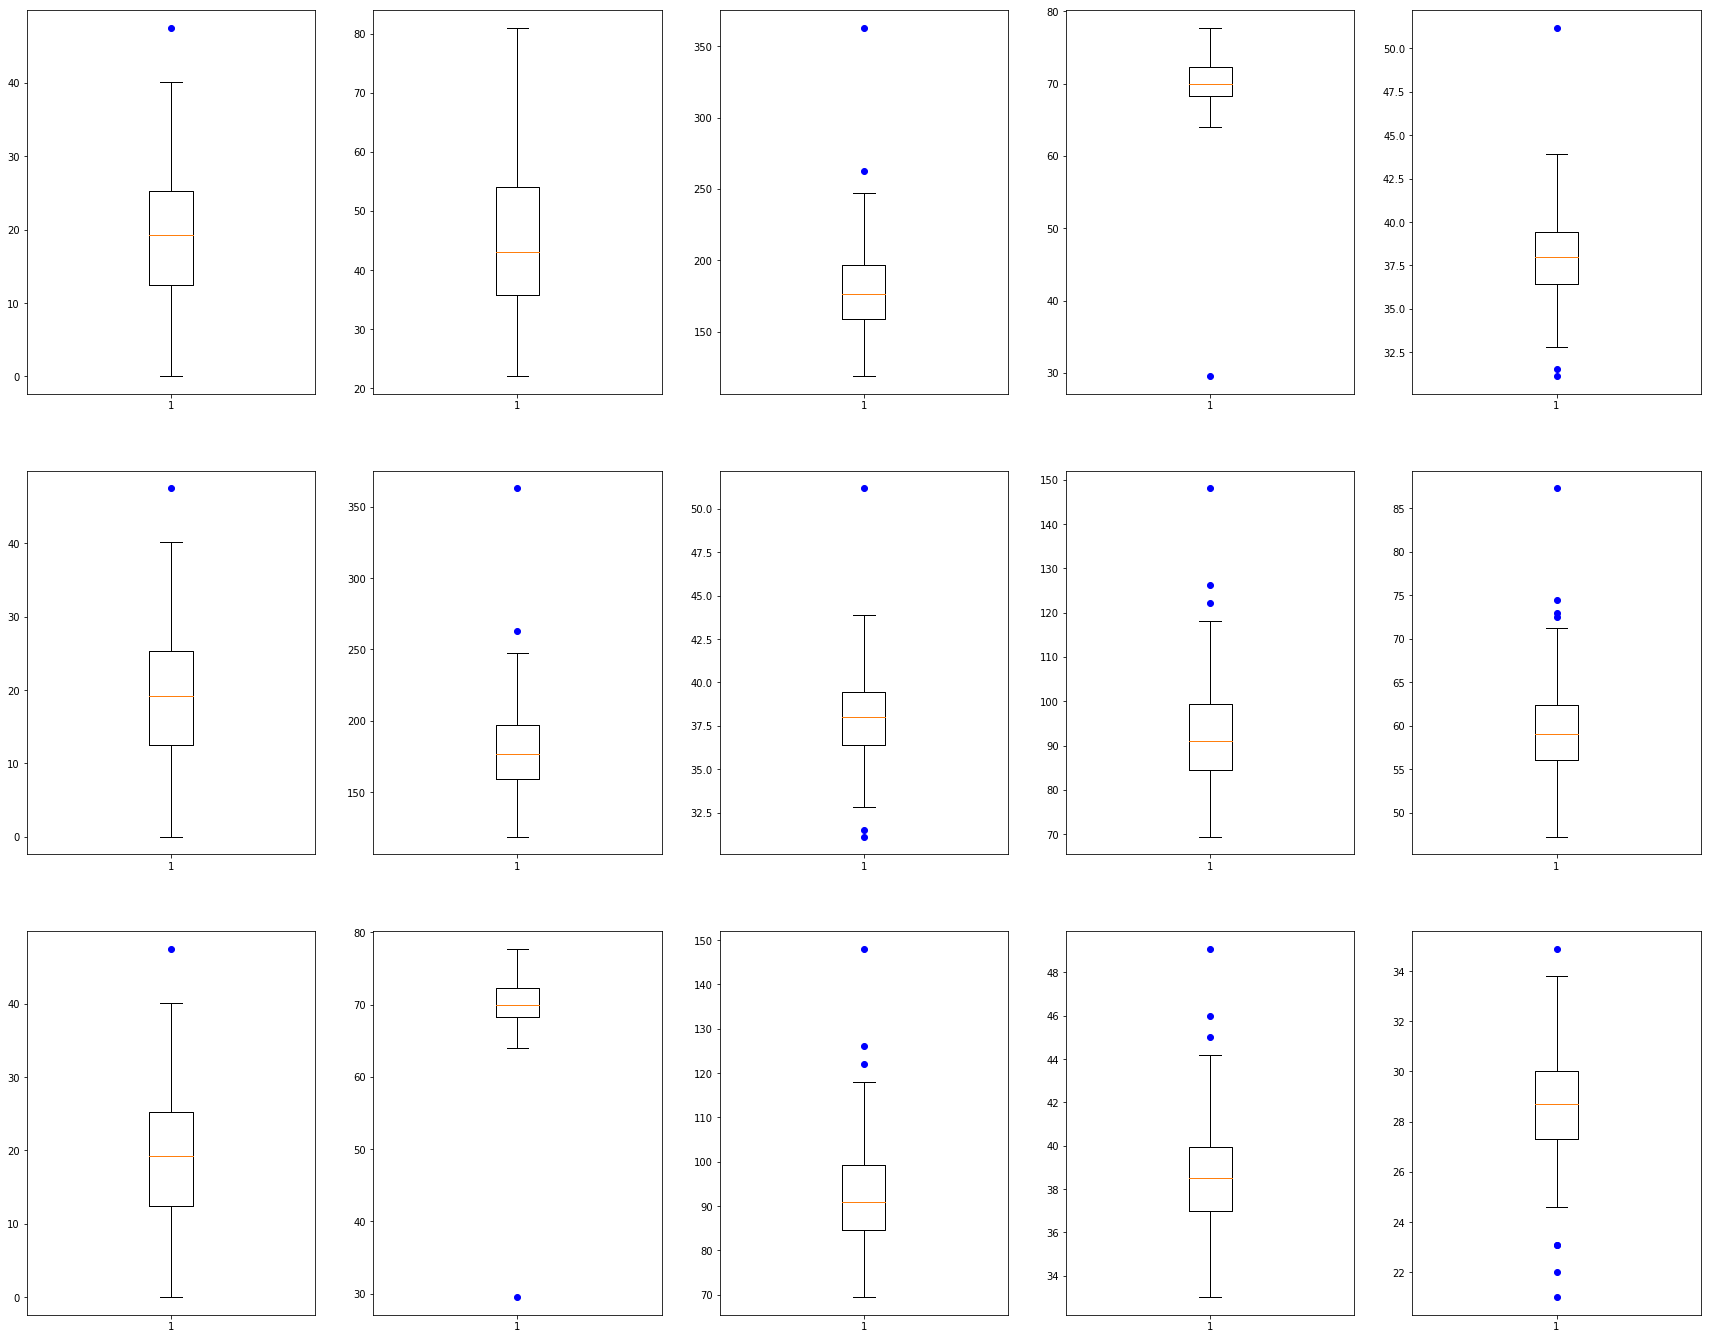

In [63]:
# Outlier Detection using Boxplot 
# Drawing boxplot frame. Length of df_raw =15, 3*5 matrix give frame without any waste frames.

f, ax = plt.subplots(3, 5, figsize=(30, 24))

# Using for loop, drawing boxplot by cell

for i in range (3):
    for j in range (5):
        ax[i, j].boxplot(df_raw.iloc[:,i*j+j], sym="bo")

plt.show()

In [83]:
# Create new row 
# Calculate BMI
# Add BMI to new row

# BMI = wegith(kg) / height(m)**2
# weight 1lb = 0.45kg, height = 1inch = 2.54cm = 0.0254M

df_raw["BMI"] = df_raw["WEIGHT"]*0.45 / ((df_raw["HEIGHT"]*0.0254)**2)

In [35]:
df_raw["BMI"].head(5)

0    48.523870
1    23.082595
2    26.422478
3    23.838617
4    37.293165
Name: BMI, dtype: float64

In [66]:
df_raw.head(5)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


#### Step 2 : Drawing the big picture ; Scatter Plot & Correlations

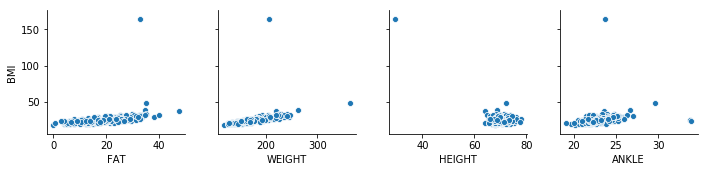

In [69]:
# Scatter plot shows the rough trend of the data

sns.pairplot(df_raw, y_vars="BMI", x_vars=["FAT", "WEIGHT", "HEIGHT", "ANKLE"])

In [74]:
for i in range(1, 15, 1):
    num1, num2 = np.percentile(df_raw.iloc[:,[i]], [25, 75])
    iqr_max = num2 + 1.5 * (num2- num1)
    iqr_min = num1 - 1.5 * (num2- num1)
    for j in range(0, len(df_raw.iloc[:,[i]])) :
        if (df_raw.iloc[j,i] > iqr_max):
            df_raw.iloc[j,i] = iqr_max
        elif (df_raw.iloc[j,i] < iqr_min) :
            df_raw.iloc[j,i] = iqr_min

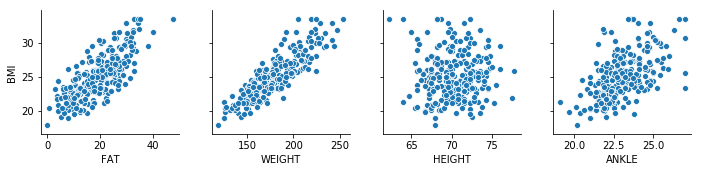

In [75]:
sns.pairplot(df_raw, y_vars="BMI", x_vars=["FAT", "WEIGHT", "HEIGHT", "ANKLE"])

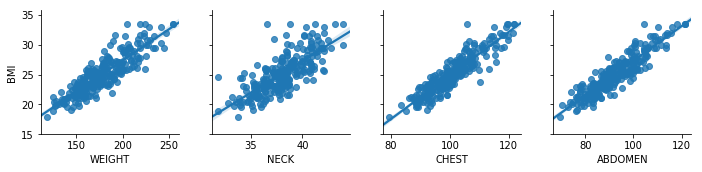

In [77]:
sns.pairplot(df_raw, y_vars="BMI", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind="reg")

In [78]:
# Correlation
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.626,-0.043,0.493,0.707,0.828,0.646,0.564,0.506,0.307,0.492,0.374,0.340,0.752
AGE,0.291,1.000,-0.015,-0.240,0.118,0.182,0.240,-0.058,-0.210,0.013,-0.141,-0.043,-0.087,0.215,0.123
WEIGHT,0.626,-0.015,1.000,0.493,0.814,0.893,0.877,0.931,0.855,0.851,0.706,0.793,0.699,0.724,0.872
HEIGHT,-0.043,-0.240,0.493,1.000,0.329,0.220,0.177,0.369,0.317,0.481,0.450,0.310,0.325,0.410,0.013
NECK,0.493,0.118,0.814,0.329,1.000,0.774,0.734,0.702,0.667,0.653,0.539,0.717,0.678,0.743,0.751
CHEST,0.707,0.182,0.893,0.220,0.774,1.000,0.911,0.821,0.712,0.711,0.548,0.718,0.616,0.644,0.908
ABDOMEN,0.828,0.240,0.877,0.177,0.734,0.911,1.000,0.860,0.745,0.724,0.512,0.669,0.543,0.601,0.912
HIP,0.646,-0.058,0.931,0.369,0.702,0.821,0.860,1.000,0.889,0.832,0.634,0.730,0.615,0.608,0.865
THIGH,0.564,-0.210,0.855,0.317,0.667,0.712,0.745,0.889,1.000,0.792,0.635,0.749,0.616,0.541,0.805
KNEE,0.506,0.013,0.851,0.481,0.653,0.711,0.724,0.832,0.792,1.000,0.710,0.665,0.594,0.661,0.719


In [88]:
# Correlation (max to min)

df_raw.corr().loc["BMI"].sort_values()

HEIGHT    -0.012186
AGE        0.119698
ANKLE      0.548701
WRIST      0.588665
FOREARM    0.611911
KNEE       0.695869
BICEPS     0.724047
NECK       0.736139
FAT        0.751571
THIGH      0.796689
WEIGHT     0.860652
HIP        0.860926
CHEST      0.897190
ABDOMEN    0.906532
BMI        1.000000
Name: BMI, dtype: float64

#### Step 3: Linear Regression Modeling

In [91]:
import statsmodels.formula.api as smf

In [98]:
for item in list(df_raw):
    print(item, end=' + ')

FAT + AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI + 

In [102]:
# model with all variables

reg_model = smf.ols(formula = "BMI ~ FAT + AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2607.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):          1.20e-250
Time:                        08:49:02   Log-Likelihood:                -31.118
No. Observations:                 252   AIC:                             92.24
Df Residuals:                     237   BIC:                             145.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.8127      1.526     31.338      0.0

In [93]:
# Making regression model only using correlation value
# and Comparing to model with all variables
reg_model = smf.ols(formula = "BMI ~ ABDOMEN + CHEST + HIP + WEIGHT + CHEST + THIGH", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     377.1
Date:                Wed, 17 Jul 2019   Prob (F-statistic):          3.92e-113
Time:                        08:45:28   Log-Likelihood:                -394.54
No. Observations:                 252   AIC:                             801.1
Df Residuals:                     246   BIC:                             822.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.4750      2.486     -8.237      0.0

In [107]:
# Comparing two tables, T-Values are varies
# It indicates that there might be a multicollinearity.

from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df_raw_x = df_raw.drop("BMI", axis=1)
df_raw_x_const = add_constant(df_raw_x) # adding statsmodels constant columns
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [vif(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

# Sorting VIF values

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
2,AGE,2.330
13,FOREARM,2.582
11,ANKLE,2.825
4,HEIGHT,3.211
12,BICEPS,3.549
14,WRIST,3.765
1,FAT,4.112
5,NECK,4.265
10,KNEE,4.955
9,THIGH,7.578


In [108]:
# Testing linear regression model after eliminating variable with possible multicollinearity

df_raw_x_const = df_raw_x_const.drop("WEIGHT", axis=1) 

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [vif(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.767
2,AGE,2.269
12,FOREARM,2.542
10,ANKLE,2.651
11,BICEPS,3.426
13,WRIST,3.717
4,NECK,3.999
1,FAT,4.110
9,KNEE,4.926
8,THIGH,7.329


In [109]:
# Testing linear regression model after eliminating variable with possible multicollinearity

df_raw_x_const = df_raw_x_const.drop("ABDOMEN", axis=1) 

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [vif(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.766
2,AGE,2.152
11,FOREARM,2.503
9,ANKLE,2.647
1,FAT,2.799
10,BICEPS,3.392
12,WRIST,3.707
4,NECK,3.891
8,KNEE,4.925
5,CHEST,5.443


In [110]:
for item in list(df_raw_x_const):
    print(item, end=' + ')

const + FAT + AGE + HEIGHT + NECK + CHEST + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + 

In [133]:
# Comparing to model with others
reg_model = smf.ols(formula = "BMI ~ FAT + AGE + HEIGHT + NECK + CHEST + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     569.3
Date:                Wed, 17 Jul 2019   Prob (F-statistic):          3.14e-168
Time:                        09:44:37   Log-Likelihood:                -239.83
No. Observations:                 252   AIC:                             505.7
Df Residuals:                     239   BIC:                             551.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4620      1.247      2.777      0.0

In [112]:
# Results shows that there are multiple variable with high T-value.
# Eliminate variable with more than +- 5 of T-values step by step from higest.

reg_model = smf.ols(formula = "BMI ~ FAT + AGE + NECK + CHEST + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 17 Jul 2019   Prob (F-statistic):          1.14e-107
Time:                        09:00:29   Log-Likelihood:                -390.04
No. Observations:                 252   AIC:                             804.1
Df Residuals:                     240   BIC:                             846.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.3133      1.792     -7.989      0.0

In [136]:
reg_model = smf.ols(formula = "BMI ~ FAT + AGE + NECK + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     139.4
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           3.20e-94
Time:                        09:44:54   Log-Likelihood:                -425.36
No. Observations:                 252   AIC:                             872.7
Df Residuals:                     241   BIC:                             911.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.2148      2.042     -7.941      0.0

In [117]:
# Backward Elimination

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  # Recrusive Factor Elimination << Elminating factors that are not relavant

df_raw_y = df_raw["FAT"]
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select=5).fit(df_raw_x, df_raw_y)

selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variable : {}".format(selected_cols))
print("Removed Variable : {}".format(removed_cols))

Selected Variable : Index(['FAT', 'NECK', 'ABDOMEN', 'ANKLE', 'FOREARM'], dtype='object')
Removed Variable : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'BICEPS',
       'WRIST'],
      dtype='object')


In [118]:
for item in list(selected_cols):
    print(item, end=' + ')

FAT + NECK + ABDOMEN + ANKLE + FOREARM + 

In [129]:
# Testing linear regression model with the selected variables derived by the backward elimination

reg_model = smf.ols(formula = "BMI ~ FAT + NECK + ABDOMEN + ANKLE + FOREARM", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     274.0
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.26e-98
Time:                        09:44:12   Log-Likelihood:                -429.42
No. Observations:                 252   AIC:                             870.8
Df Residuals:                     246   BIC:                             892.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.5573      1.729     -6.108      0.0

In [121]:
# 3 different elimination method result
# Correlation value : 0.882
# VIF : 0.846
# Backward elimination: 0.846

#### Step 4 : Residual analysis

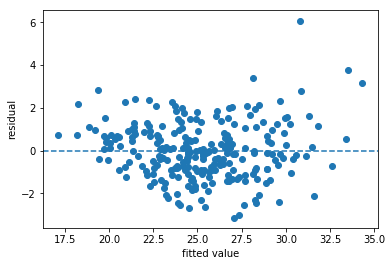

In [137]:
# 등분산성/독립성 검정
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value");plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

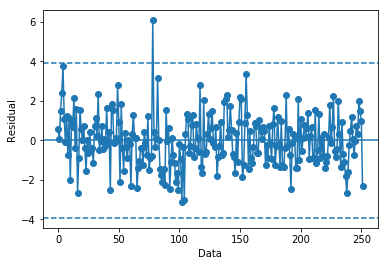

In [138]:
plt.plot(df_raw.index, reg_result.resid, marker="o")
plt.xlabel("Data");plt.ylabel("Residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

NormaltestResult(statistic=18.65111222993471, pvalue=8.911738586515583e-05)

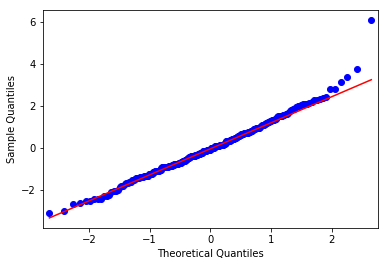

In [139]:
# 정규성 검정
qqplot(reg_result.resid, line="q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

## Conclusion